In [178]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import dtale

In [179]:
df_global = pd.read_table("dataset/ncov_global.tsv")
df_europe = pd.read_table("dataset/ncov_europe.tsv")
df_oceania = pd.read_table("dataset/ncov_oceania.tsv")
df_na = pd.read_table("dataset/ncov_north-america.tsv")
df_sa = pd.read_table("dataset/ncov_south-america.tsv") 
df_africa = pd.read_table("dataset/ncov_africa.tsv")
df_asia = pd.read_table("dataset/ncov_asia.tsv")
df = pd.concat([df_europe, df_oceania, df_na, df_sa, df_africa, df_asia], ignore_index=True)
df["date"] = pd.to_datetime(df["date"])

In [180]:
if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
    df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop("index", axis=1, errors="ignore")
df.columns = [
    str(c) for c in df.columns
]  # update columns to strings in case they are numbers

s = df["Nextstrain_clade"]
df.loc[:, "Nextstrain_clade"] = s
s = df["Nextstrain_clade"]
s = s.replace(
    {
        "20E (EU1)": "Other",
        "20G": "Other",
        "19A": "Other",
        "20C": "Other",
        "20B": "Other",
    }
)
df.loc[:, "Nextstrain_clade"] = s
s = df["Nextstrain_clade"]
s = s.replace({"20A": "Other", "19B": "Other"})
df.loc[:, "Nextstrain_clade"] = s
s = df["Nextstrain_clade"]
s = s.replace({"20A.EU2": "Other"})
df.loc[:, "Nextstrain_clade"] = s
s = df["Nextstrain_clade"]
s = s.replace({"20D": "Other"})
df.loc[:, "Nextstrain_clade"] = s
s = df["Nextstrain_clade"]
s = s.replace({"20F": "Other"})
df.loc[:, "Nextstrain_clade"] = s
s = df["Nextstrain_clade"]
s = s.replace({"?": "Other"})
df.loc[:, "Nextstrain_clade"] = s

In [181]:
df = df[(df["date"] < "2021-03-18")]

idx_keep = []
for country in df["country"].unique().tolist():
    # date offset from the last sequence
    date_offset = max(df[df["country"] == country]["date"]) - pd.DateOffset(months=1)
    idx_keep += df[
        (df["country"] == country) & (df["date"] >= date_offset)
    ].index.tolist()

idx_keep = sorted(idx_keep)
df = df.loc[idx_keep]

In [182]:
df = pd.pivot_table(
    df,
    index=["country"],
    columns=["Nextstrain_clade"],
    values=["length"],
    aggfunc="count",
)
df.columns = df.columns.droplevel(0)
df = df.rename_axis(None, axis=1)
if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
    df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop("index", axis=1, errors="ignore")
df.columns = [
    str(c) for c in df.columns
]  # update columns to strings in case they are numbers

In [183]:
df["Total"] = np.sum(df[df.columns.tolist()[1:]], axis=1)

variant_names = df.columns.tolist()[1:-1]

for col in variant_names:
    df[col + "_%"] = np.round(df[col] / df["Total"] * 100, 0)

df["tmp"] = np.sum(df[variant_names[:-1]], axis=1)

df = df[df["tmp"] > 0]
df[df.country == "Brazil"]

# remove countries that don't have Other variants, they always have low numbers
df = df[~df.Other.isnull()]

In [184]:
dtale.show(df)

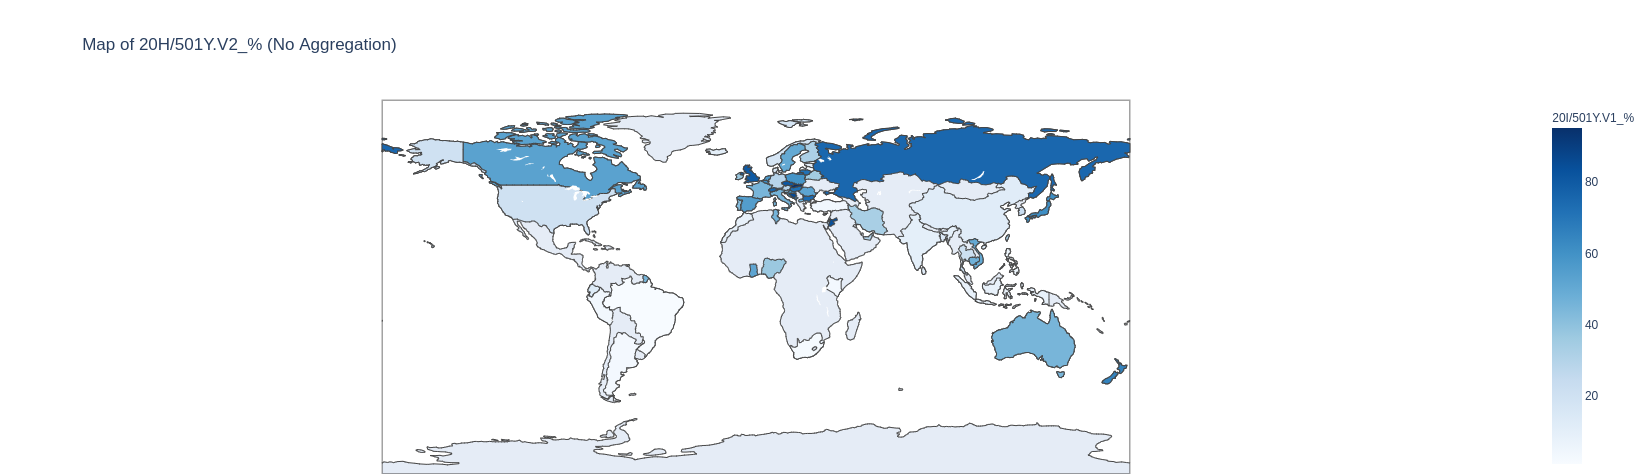

In [185]:
if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
    df = df.to_frame(index=False)
virus_clade = "20I/501Y.V1_%"
# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop("index", axis=1, errors="ignore")
df.columns = [
    str(c) for c in df.columns
]  # update columns to strings in case they are numbers

df = df[[c for c in df.columns if c != "index"]]
chart_data = pd.concat([df["country"], df[virus_clade],], axis=1)
chart_data = chart_data.dropna(subset=["country"])

import plotly.graph_objs as go

chart = go.Choropleth(
    locations=chart_data["country"],
    locationmode="country names",
    z=chart_data[virus_clade],
    colorscale="Blues",
    colorbar_title=virus_clade,
    zmin=chart_data[virus_clade].min(),
    zmax=chart_data[virus_clade].max(),
)
figure = go.Figure(
    data=[chart],
    layout=go.Layout(
        {
            "autosize": True,
            "legend": {"orientation": "h"},
            "margin": {"b": 0, "l": 0, "r": 0},
            "title": {"text": "Map of 20H/501Y.V2_% (No Aggregation)"},
        }
    ),
)

figure.show()

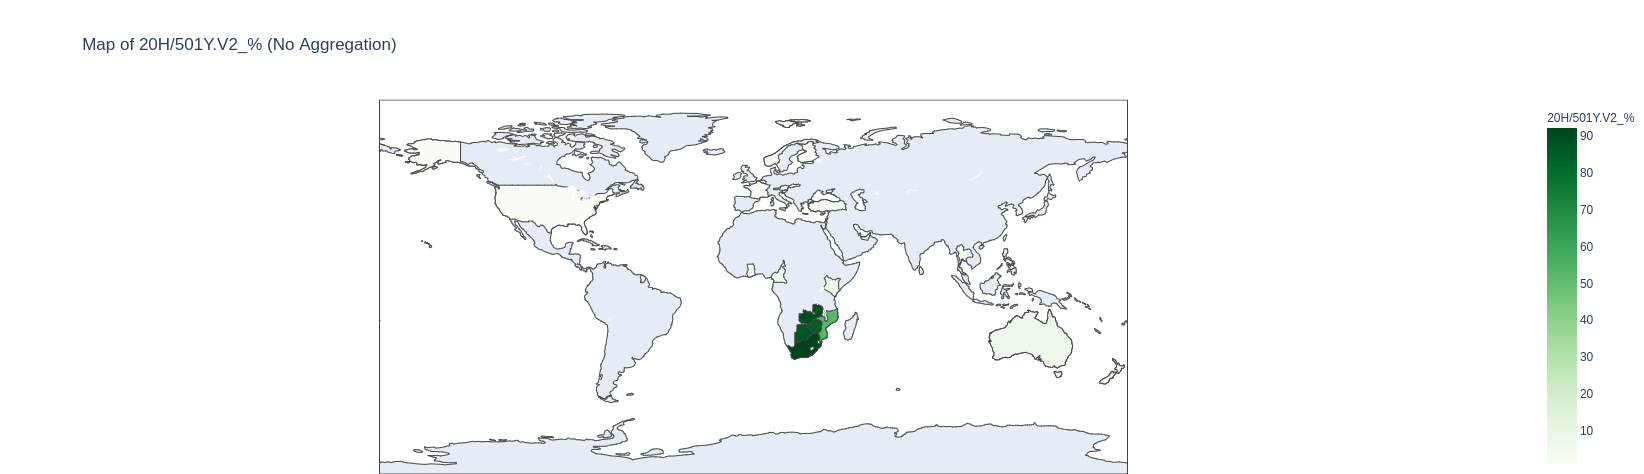

In [186]:
if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
    df = df.to_frame(index=False)
virus_clade = "20H/501Y.V2_%"
# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop("index", axis=1, errors="ignore")
df.columns = [
    str(c) for c in df.columns
]  # update columns to strings in case they are numbers

df = df[[c for c in df.columns if c != "index"]]
chart_data = pd.concat([df["country"], df[virus_clade],], axis=1)
chart_data = chart_data.dropna(subset=["country"])

import plotly.graph_objs as go

chart = go.Choropleth(
    locations=chart_data["country"],
    locationmode="country names",
    z=chart_data[virus_clade],
    colorscale="Greens",
    colorbar_title=virus_clade,
    zmin=chart_data[virus_clade].min(),
    zmax=chart_data[virus_clade].max(),
)
figure = go.Figure(
    data=[chart],
    layout=go.Layout(
        {
            "autosize": True,
            "legend": {"orientation": "h"},
            "margin": {"b": 0, "l": 0, "r": 0},
            "title": {"text": f"Map of {virus_clade} (No Aggregation)"},
        }
    ),
)

figure.show()

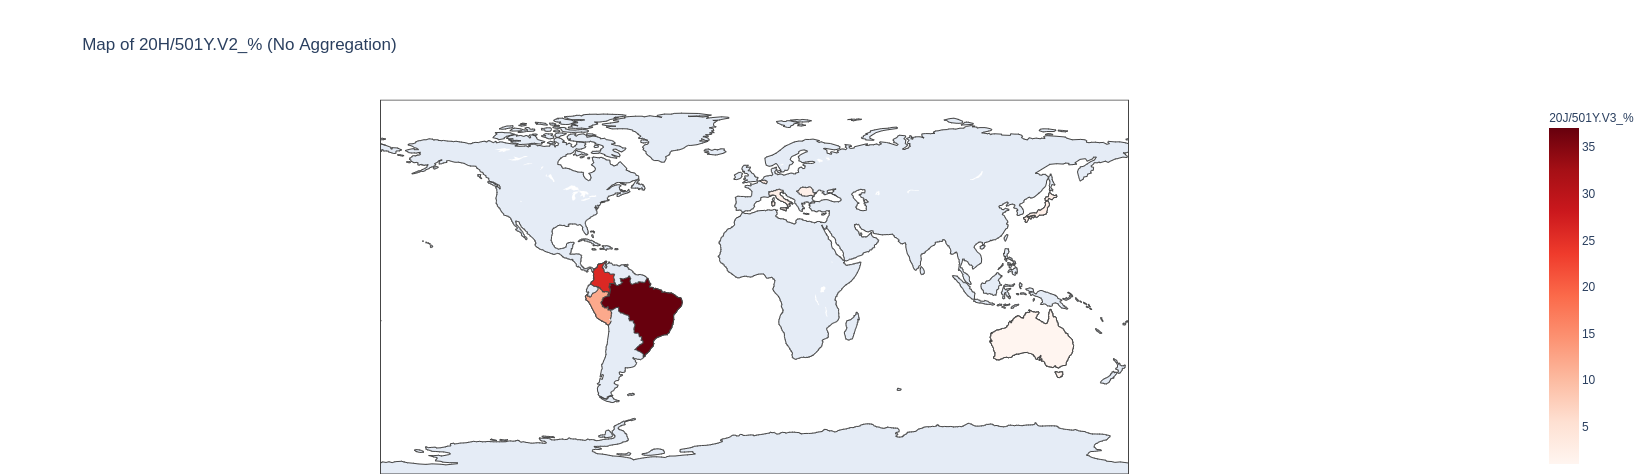

In [187]:
if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
    df = df.to_frame(index=False)
virus_clade = "20J/501Y.V3_%"
# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop("index", axis=1, errors="ignore")
df.columns = [
    str(c) for c in df.columns
]  # update columns to strings in case they are numbers

df = df[[c for c in df.columns if c != "index"]]
chart_data = pd.concat([df["country"], df[virus_clade],], axis=1)
chart_data = chart_data.dropna(subset=["country"])

import plotly.graph_objs as go

chart = go.Choropleth(
    locations=chart_data["country"],
    locationmode="country names",
    z=chart_data[virus_clade],
    colorscale="Reds",
    colorbar_title=virus_clade,
    zmin=chart_data[virus_clade].min(),
    zmax=chart_data[virus_clade].max(),
)
figure = go.Figure(
    data=[chart],
    layout=go.Layout(
        {
            "autosize": True,
            "legend": {"orientation": "h"},
            "margin": {"b": 0, "l": 0, "r": 0},
            "title": {"text": "Map of 20H/501Y.V2_% (No Aggregation)"},
        }
    ),
)

figure.show()